## <font color='#eb3483'>Exercise - Linear Regression with scikit-learn </font>

In this exercise we are going to build a regression model to predict movie `revenue`. The dataset we'll be using is called `movies.1.initial_process.csv`.

Go ahead and load the necessary libraries as well as the dataset.

In [10]:
from IPython.display import Image
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
movies = pd.read_csv('movies.1.initial_process.csv')
movies

,belongs_to_collection,budget,genre,original_language,popularity,production_company,production_country,release_date,revenue,runtime,status,title,vote_average,vote_count
0,Father of the Bride Collection,NaN,Comedy,en,8.387519,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0
1,NaN,NaN,Drama,en,0.894647,Miramax,South Africa,1995-12-15,676525.0,106.0,Released,"Cry, the Beloved Country",6.7,13.0
2,Friday Collection,3500000.0,Comedy,en,14.569650,New Line Cinema,United States of America,1995-04-26,28215918.0,91.0,Released,Friday,7.0,513.0
3,NaN,NaN,Comedy,en,8.963037,Paramount Pictures,United States of America,1996-02-01,32.0,87.0,Released,Black Sheep,6.0,124.0
4,NaN,12000000.0,Comedy,en,9.592265,Universal Pictures,United States of America,1996-02-16,41205099.0,92.0,Released,Happy Gilmore,6.5,767.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,NaN,NaN,Comedy,sv,0.661863,Svensk Filmindustri (SF),Sweden,1975-03-17,NaN,107.0,Released,The Softening of the Egg,5.3,3.0
1345,NaN,NaN,Comedy,fr,0.040481,France 2 Cinéma,France,2003-11-12,NaN,NaN,Released,Je hais les enfants!,6.5,1.0
1346,NaN,NaN,Comedy,it,0.560502,NaN,NaN,2008-12-05,NaN,0.0,Released,Torno a vivere da solo,3.7,6.0
1347,NaN,NaN,NaN,it,0.674261,NaN,Italy,2002-03-15,NaN,114.0,Released,Amnèsia,5.5,8.0


### <font color='#eb3483'>Exercise 1</font>

Select the numerical columns and replace their missing values with 0

In [29]:
movies.dtypes
movies['budget'] = movies['budget'].fillna(0)
movies['popularity'] = movies['popularity'].fillna(0)
movies['runtime'] = movies['runtime'].fillna(0)
movies['vote_average'] = movies['vote_average'].fillna(0)
movies['vote_count'] = movies['vote_count'].fillna(0)
movies['revenue'] = movies['revenue'].fillna(0)
movies

,belongs_to_collection,budget,genre,original_language,popularity,production_company,production_country,release_date,revenue,runtime,status,title,vote_average,vote_count
0,Father of the Bride Collection,0.0,Comedy,en,8.387519,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0
1,NaN,0.0,Drama,en,0.894647,Miramax,South Africa,1995-12-15,676525.0,106.0,Released,"Cry, the Beloved Country",6.7,13.0
2,Friday Collection,3500000.0,Comedy,en,14.569650,New Line Cinema,United States of America,1995-04-26,28215918.0,91.0,Released,Friday,7.0,513.0
3,NaN,0.0,Comedy,en,8.963037,Paramount Pictures,United States of America,1996-02-01,32.0,87.0,Released,Black Sheep,6.0,124.0
4,NaN,12000000.0,Comedy,en,9.592265,Universal Pictures,United States of America,1996-02-16,41205099.0,92.0,Released,Happy Gilmore,6.5,767.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,NaN,0.0,Comedy,sv,0.661863,Svensk Filmindustri (SF),Sweden,1975-03-17,0.0,107.0,Released,The Softening of the Egg,5.3,3.0
1345,NaN,0.0,Comedy,fr,0.040481,France 2 Cinéma,France,2003-11-12,0.0,0.0,Released,Je hais les enfants!,6.5,1.0
1346,NaN,0.0,Comedy,it,0.560502,NaN,NaN,2008-12-05,0.0,0.0,Released,Torno a vivere da solo,3.7,6.0
1347,NaN,0.0,NaN,it,0.674261,NaN,Italy,2002-03-15,0.0,114.0,Released,Amnèsia,5.5,8.0


### <font color='#eb3483'>Exercise 2</font>

Split the numerical data into training and test sets

In [30]:
from sklearn.model_selection import train_test_split
X=movies[["budget", "popularity", "runtime", "vote_average", "vote_count"]]
y=movies["revenue"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### <font color='#eb3483'>Exercise 3</font>

Create a linear regression model and fit it with the training set. 

In [31]:
from sklearn.linear_model import LinearRegression
LinearRegression
model=LinearRegression()
model
model.fit(X=X_train, y=y_train)

LinearRegression()

### <font color='#eb3483'>Exercise 4</font>

Predict revenue using the test set. Visualize the `popularity` against actual revenue against predicted revenue. 

Real value: 47536959.000 Estimated value: 43506299.52138
Real value: 698200.000 Estimated value: 6880548.87207
Real value: 13145977.000 Estimated value: 6208701.40315
Real value: 985007.000 Estimated value: 11382522.41807
Real value: 68766121.000 Estimated value: 98384596.00775


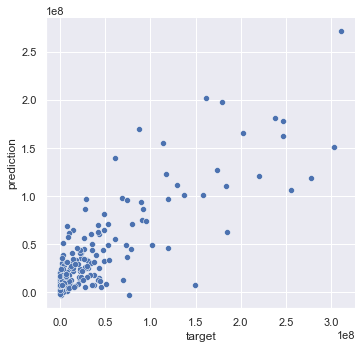

In [38]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6,5)}) 
import warnings
warnings.simplefilter("ignore")
predictions = model.predict(X_test)
predictions
for y, y_pred in list(zip(y_test, predictions))[:5]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))
X = X_test.reset_index().copy() # make a copy of indices and data
X["target"] = y_test.tolist()
X["prediction"] = predictions
X.head()
sns.relplot(x="target", y="prediction", data=X, kind="scatter")